In [32]:
import pandas as pd

#### Load data and filter columns with too many empty values

In [33]:
dfCore = pd.read_csv('Chemical_descriptors.csv', usecols=[2,5,6] + list(range(10,218)), index_col=0)
df1515 = pd.read_csv("chemical_descriptors1515.csv", usecols=[2,5,6] + list(range (10,218)), index_col=0)
dfPCA = pd.read_csv("PCAremoveNAN.csv",usecols=[2,5,6] + list(range (10,208)), index_col=0)

In [34]:
# remove all columns that have less than 90% of non-zero entries
dfCore = dfCore.loc[:,((dfCore != 0).sum() > dfCore.shape[0] * 0.9)]
df1515 = df1515.loc[:,((df1515 !=0).sum() >df1515.shape[0]*0.9 )]
dfPCA = dfPCA.loc[:,((dfPCA !=0).sum() >dfPCA.shape[0]*0.9 )]

## Remove NANs in df1515 with 0's 

In [35]:
import numpy as np

# df1515.replace(np.nan, 0) # fml

df1515["BCUT2D_MWHI"] = df1515["BCUT2D_MWHI"].replace(np.nan, 0)

df1515["BCUT2D_MWLOW"] = df1515["BCUT2D_MWLOW"].replace(np.nan, 0)

df1515["BCUT2D_CHGHI"] = df1515["BCUT2D_CHGHI"].replace(np.nan, 0)

df1515["BCUT2D_LOGPHI"] = df1515["BCUT2D_LOGPHI"].replace(np.nan, 0)

df1515["BCUT2D_LOGPLOW"] = df1515["BCUT2D_LOGPLOW"].replace(np.nan, 0)

df1515["BCUT2D_CHGLO"] = df1515["BCUT2D_CHGLO"].replace(np.nan, 0)

df1515["BCUT2D_MRHI"] = df1515["BCUT2D_MRHI"].replace(np.nan, 0)

df1515["BCUT2D_MRLOW"] = df1515["BCUT2D_MRLOW"].replace(np.nan, 0)

df1515["MaxPartialCharge"] = df1515["MaxPartialCharge"].replace(np.nan, 0)

df1515["MinPartialCharge"] = df1515["MinPartialCharge"].replace(np.nan, 0)

df1515["MaxAbsPartialCharge"] = df1515["MaxAbsPartialCharge"].replace(np.nan, 0)

df1515["MinAbsPartialCharge"] = df1515["MinAbsPartialCharge"].replace(np.nan, 0)

In [36]:
#df.sample(5)
#df1515.sample(5)

#### Analyse the distribution of values for each descriptor

In [37]:
import matplotlib.pyplot as plt

## Plot e.coli core metabolite feature distributions


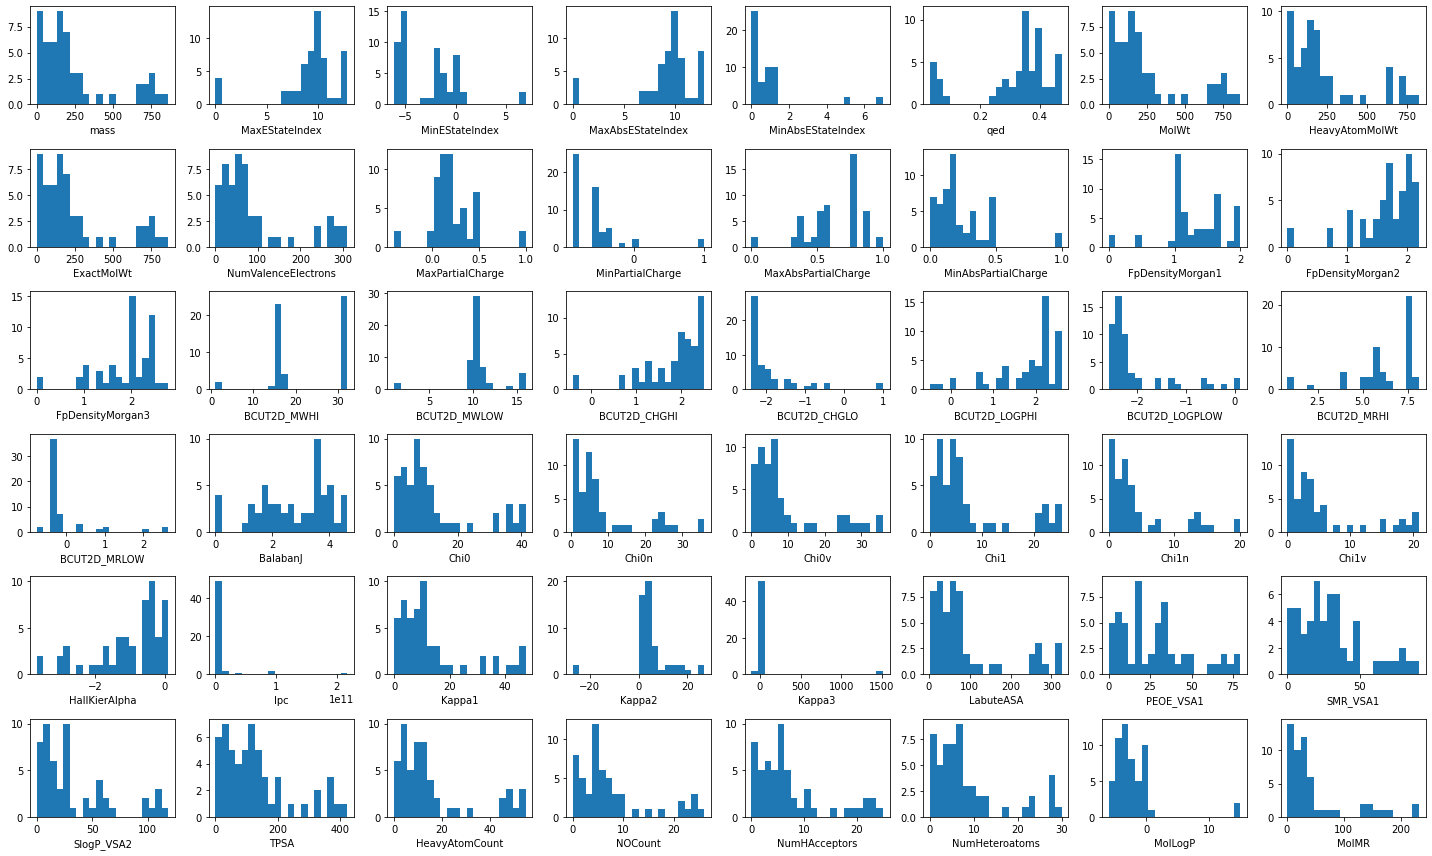

In [38]:
f, axs = plt.subplots(6, 8, figsize=(20, 12))
axs = axs.flatten()

for i in range(48):
    dfCore.iloc[:,i].plot.hist(ax=axs[i], bins=20)
    axs[i].set_xlabel(dfCore.columns[i])
    axs[i].set_ylabel('')
    
f.tight_layout()

## Plot e.coli iML1515 metabolite feature distributions

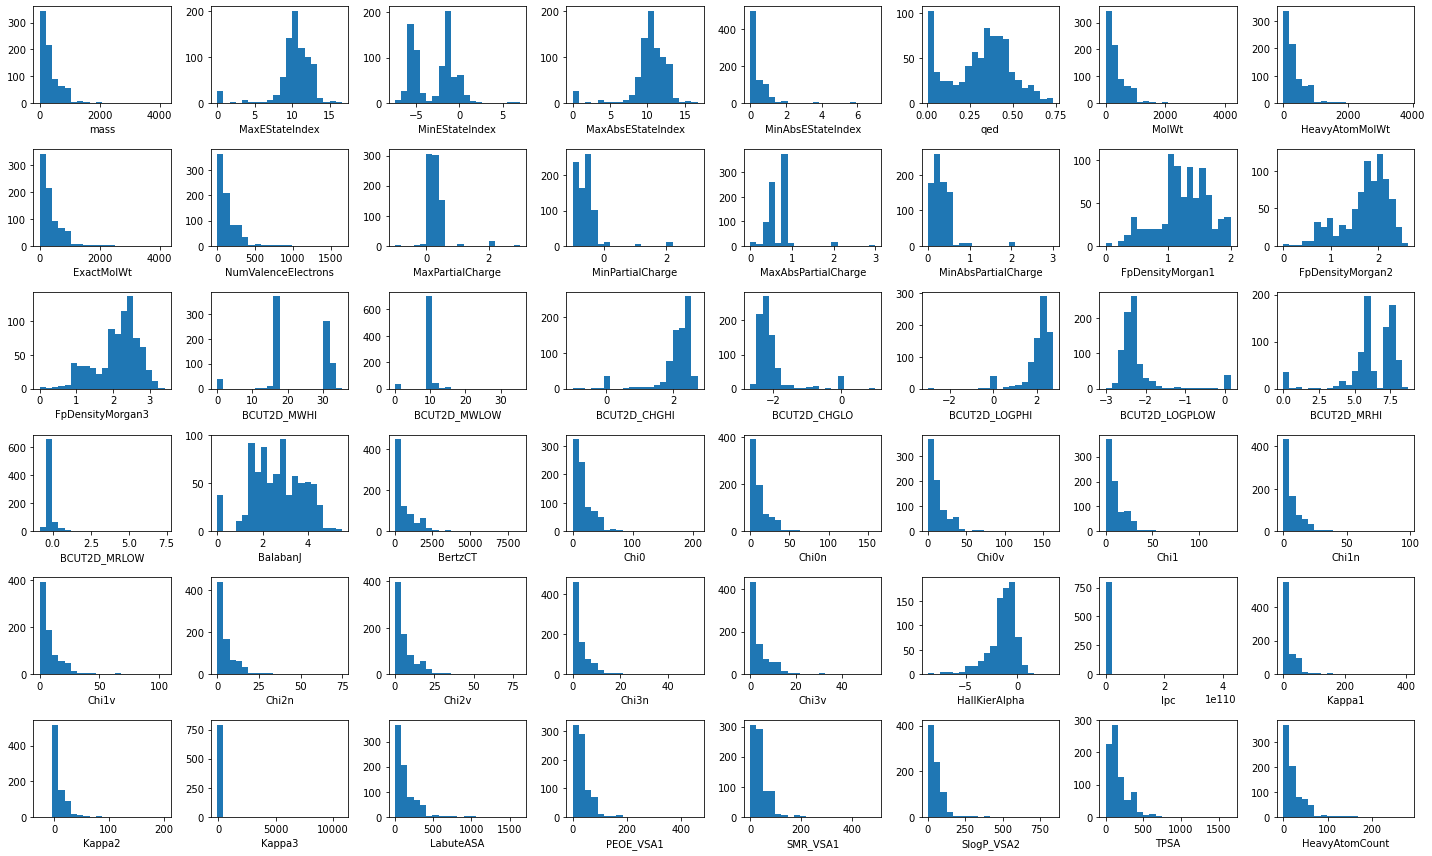

In [39]:
f, axs = plt.subplots(6, 8, figsize=(20, 12))
axs = axs.flatten()

for i in range(48):
    df1515.iloc[:,i].plot.hist(ax=axs[i], bins=20)
    axs[i].set_xlabel(df1515.columns[i])
    axs[i].set_ylabel('')
    
f.tight_layout()

### Plot 1515 data with removed nan 

#### Estimate Spearman correlation between all pairs of descriptors

In [40]:
from scipy.stats import spearmanr
correlation = [(d1, d2, spearmanr(dfCore.loc[:,d1], dfCore.loc[:,d2])[0]) for d1 in dfCore.columns for d2 in dfCore.columns]
correlation1515 = [(d1_1515, d2_1515, spearmanr(df1515.loc[:,d1_1515], df1515.loc[:,d2_1515])[0]) for d1_1515 in df1515.columns for d2_1515 in df1515.columns]
# correlationPCA = [(d1PCA, d2PCA, spearmanr(dfPCA.loc[:,d1PCA], dfPCA.loc[:,d2PCA])[0]) for d1PCA in dfPCA.columns for d2PCA in dfPCA.columns]


In [41]:
dfCore_2 = pd.DataFrame(correlation, columns=['d1', 'd2', 'value'])
df1515_2 = pd.DataFrame(correlation1515, columns =["d1_1515", "d2_1515","value1515"])
# dfPCA_2 = pd.DataFrame(correlation, columns=['d1PCA', 'd2PCA', 'valuePCA'])

In [42]:
dfCore_3 = dfCore_2.pivot_table(index='d1', columns='d2', values='value')
df1515_3 = df1515_2.pivot_table(index ="d1_1515", columns = "d2_1515", values = "value1515")
# dfPCA_3 = dfPCA_2.pivot_table(index = "d1PCA", columns = "d2PCA", values= "valuePCA")

In [43]:
import seaborn as sns

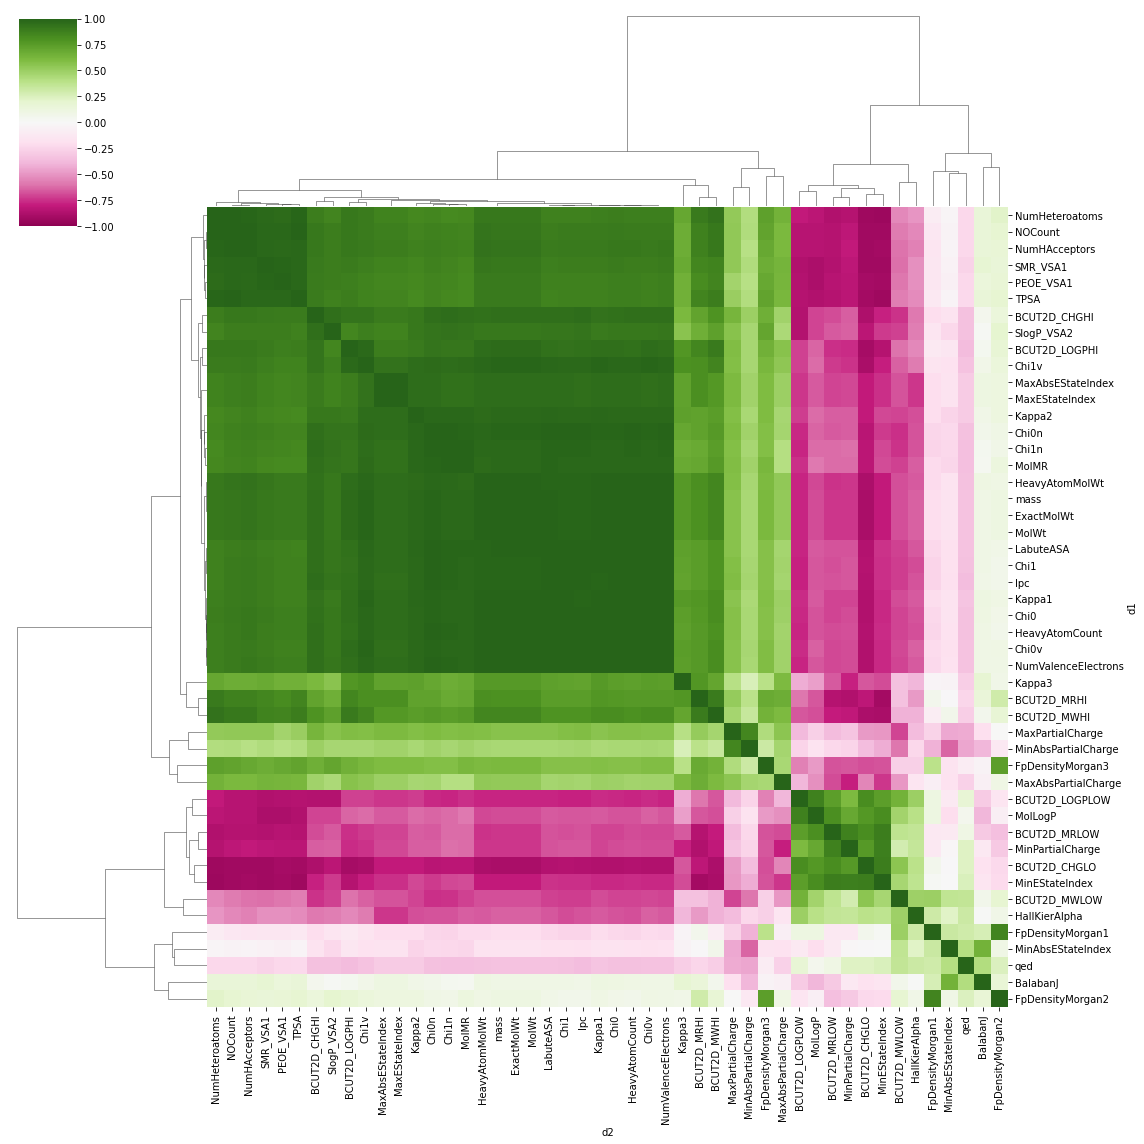

In [44]:
sns.clustermap(df3, vmin=-1, vmax=1, cmap='PiYG', figsize=(16,16))

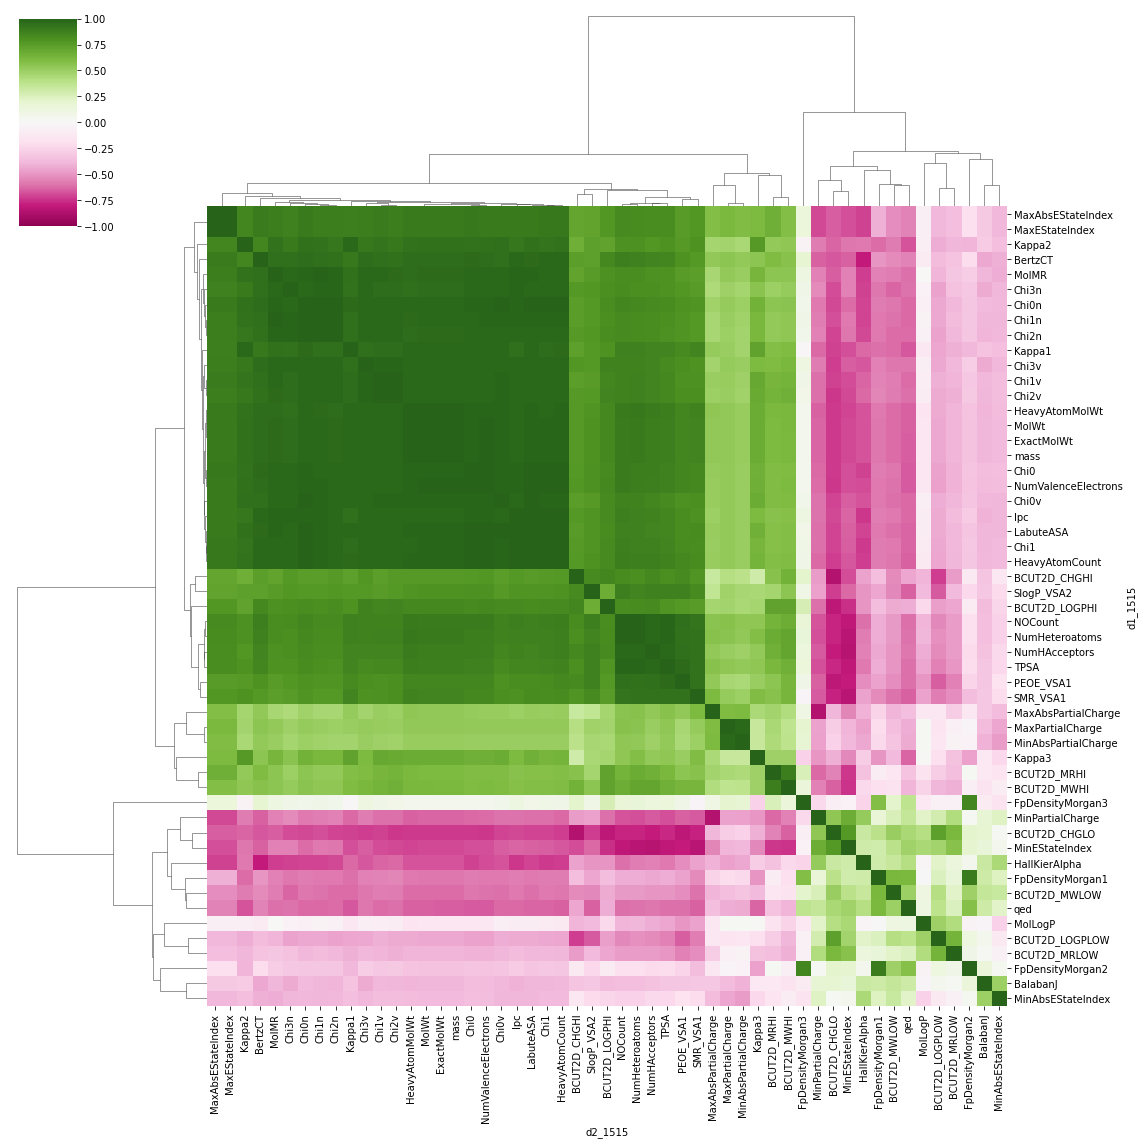

In [45]:
sns.clustermap(df1515_3, vmin=-1, vmax=1, cmap='PiYG', figsize=(16,16))

In [46]:
# sns.clustermap(dfPCA_3, vmin=-1, vmax=1, cmap='PiYG', figsize=(16,16))

#### Do scatter plots for pairs of features with low correlation

In [47]:
lowest = dfCore_2.query("abs(value) < 0.1 and d1 < d2")  # d1 < d2 is just to avoid plotting (a,b) and (b,a)
lowest_1515 = df1515_2.query("abs(value1515) < 0.1 and d1_1515 < d2_1515")  # d1 < d2 is just to avoid plotting (a,b) and (b,a)
# lowest_PCA = dfPCA_2.query("abs(valuePCA) < 0.1 and d1PCA < d2PCA")  # d1 < d2 is just to avoid plotting (a,b) and (b,a)

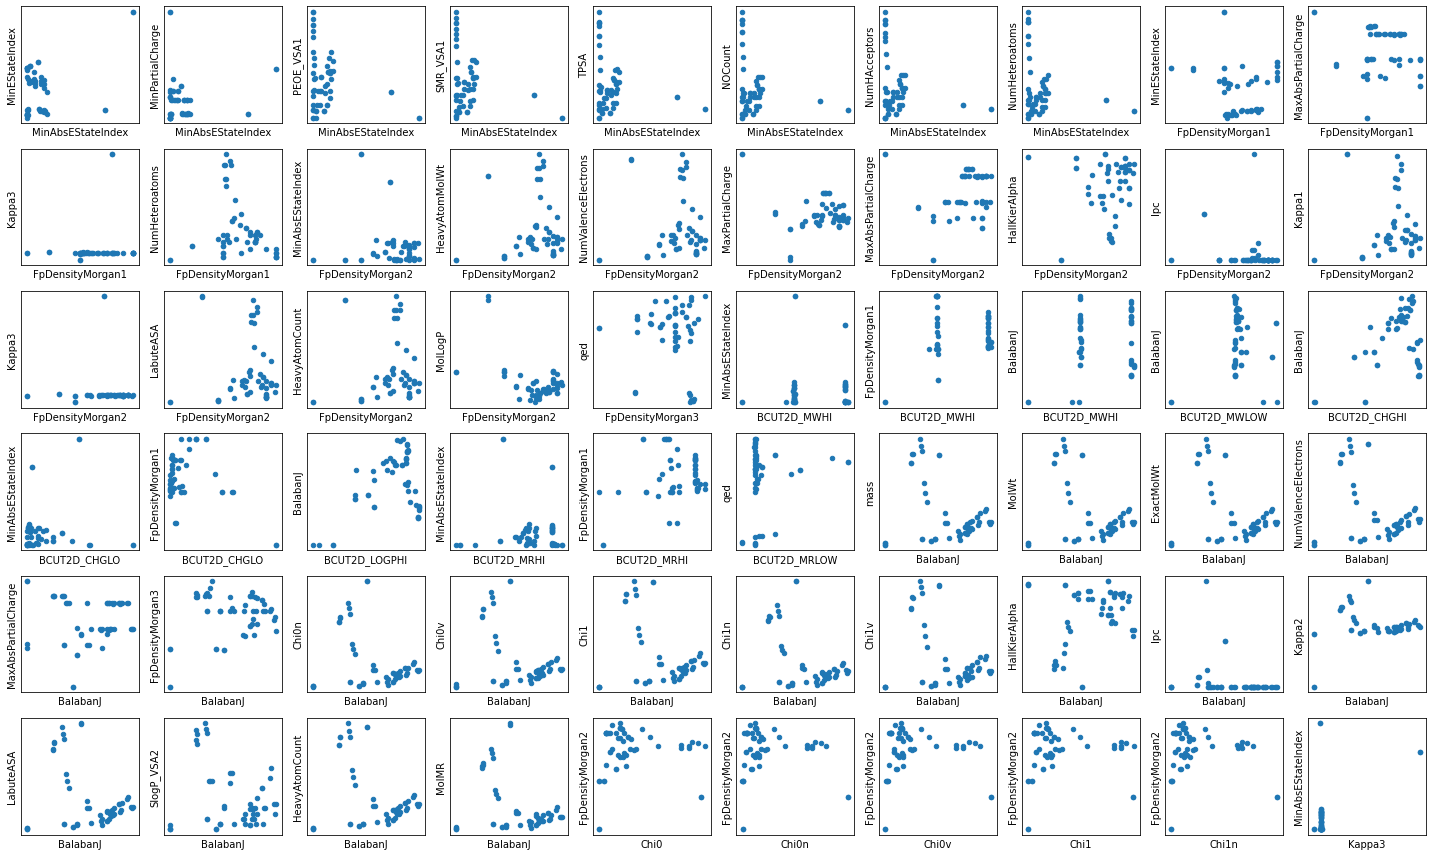

In [48]:
f, axs = plt.subplots(6, 10, figsize=(20, 12))
axs = axs.flatten()

for i in range(60):
    dfCore.plot.scatter(lowest.iloc[i,0], lowest.iloc[i,1], ax=axs[i])
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    
f.tight_layout()

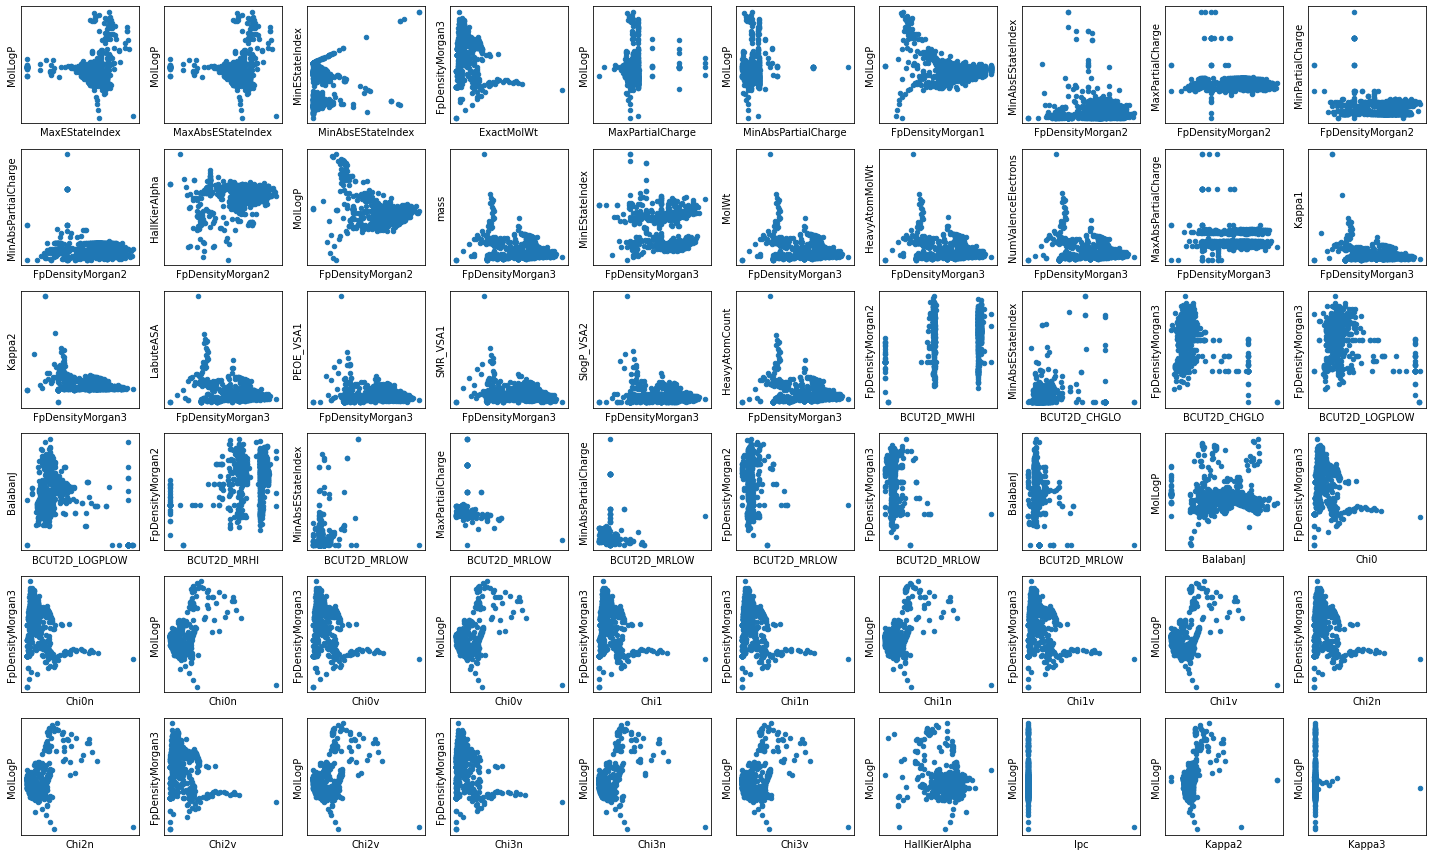

In [49]:
f, axs = plt.subplots(6, 10, figsize=(20, 12))
axs = axs.flatten()

for i in range(60):
    df1515.plot.scatter(lowest_1515.iloc[i,0], lowest_1515.iloc[i,1], ax=axs[i])
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    
f.tight_layout()

In [50]:
#f, axs = plt.subplots(6, 10, figsize=(20, 12))
# axs = axs.flatten()

#for i in range(60):
   #  dfPCA.plot.scatter(lowest_1515.iloc[i,0], lowest_1515.iloc[i,1], ax=axs[i])
   #  axs[i].set_xticks([])
  #  axs[i].set_yticks([])
    
# f.tight_layout()